In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/DELL 5410/Downloads/ANN_Data/ANN_Data/data1.csv', header=None)
labels = pd.read_csv('C:/Users/DELL 5410/Downloads/ANN_Data/ANN_Data/label1.csv', header=None)

In [3]:
print(data)
print(labels)

             0         1         2         3         4         5         6   \
0     -0.446891 -0.013397  0.232645  2.156649  1.652923 -0.210531 -0.662227   
1      0.243747 -1.144175 -0.622214 -0.661979 -0.373315  0.520313 -1.307954   
2     -1.417799 -0.088833 -0.647181 -1.141497 -1.321100  0.686798 -1.045569   
3      0.656784  0.381201 -1.039011  1.285315  0.808324  1.428519 -1.144367   
4      1.098520  1.706769 -1.030370  2.001009  2.751551  1.202229 -0.941066   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.146324 -0.618555  0.547413  0.851301  0.838880 -1.248402  0.698199   
19996 -2.227923 -0.327196  1.258849 -0.945254  3.925262  0.316686 -1.061159   
19997 -0.800405  1.477997  0.090057 -0.973997 -0.204970  0.224539  0.302265   
19998 -1.217344 -0.785401 -0.413781 -0.335324  0.181671 -1.685733 -0.437981   
19999  1.601005 -0.890398 -1.425049  0.887501  0.167205 -0.395042 -0.512554   

             7         8         9         10      

In [4]:
data=data.values
npLabels=labels.values
print(data.shape)
print(npLabels.shape)

(20000, 20)
(20000, 1)


In [5]:
print(np.max(npLabels))
print(np.min(npLabels))

4
0


In [6]:
np.unique(npLabels)

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
num=np.max(npLabels)+1
oneHot=np.eye(num)[npLabels]
print(oneHot.ndim)
print(oneHot.shape)

3
(20000, 1, 5)


In [8]:
oneHotRe=oneHot.reshape(20000, 5)
print(oneHotRe)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [9]:
trainData,testDataDash=train_test_split(data,train_size=0.8,test_size=0.2,shuffle=False)
trainLabel,testLabelDash=train_test_split(oneHotRe,train_size=0.8,test_size=0.2,shuffle=False)

In [10]:
validData,testData=train_test_split(testDataDash,train_size=0.5,test_size=0.5,shuffle=False)
validLabel,testLabel=train_test_split(testLabelDash,train_size=0.5,test_size=0.5,shuffle=False)

In [11]:
h = 15

In [12]:
b1=np.zeros(h)
b2=np.zeros(5)
print(b1)
print(b2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [13]:
w1=np.random.normal(0, 1, (20,h))
w2=np.random.normal(0, 1, (h,5))

In [14]:
def actFunc(data,choice):

    if(choice==1):
        return np.tanh(data)
    elif(choice==2):
        numerator=np.exp(data)
        return numerator/np.sum(numerator,axis=1,keepdims=True)

In [15]:
alpha = 0.003

In [16]:
batch=1000

In [17]:
def costFunc(y,t):
    return -(t*(np.log(y))+(1-t)*np.log(1-y))

In [18]:
def forwFunc(data):
    a0=data
    z1=np.dot(a0,w1)+b1
    a1=actFunc(z1,1)
    z2=np.dot(a1,w2)+b2
    a2=actFunc(z2,2)
    return a0,z1,a1,z2,a2

In [19]:
def Acc(y,t,size):
    maxData=np.argmax(y,axis=1)
    maxLabel=np.argmax(t,axis=1)
    compare=np.equal(maxData,maxLabel)
    count=np.sum(compare)
    return (count/size)*100

In [20]:
epochs=500

In [21]:
cost = []
for epoch in range(epochs):
    for iteration in range(int(len(trainData)/batch)):
        a0,z1,a1,z2,a2=forwFunc(trainData[iteration*batch:(iteration+1)*batch,:])
        y=a2
        labelBatch=trainLabel[iteration*batch:(iteration+1)*batch,:]
        del2=(y-labelBatch)
        del1=np.dot(del2,w2.T)*(1 - a1**2)
        dcdw2=np.dot(a1.T,del2)
        dcdw1=np.dot(a0.T,del1)
        dcdb1=np.sum(del1,axis=0)
        dcdb2=np.sum(del2,axis=0)
        w1=w1-alpha*dcdw1
        w2=w2-alpha*dcdw2
        b2=b2-alpha*dcdb2
        b1=b1-alpha*dcdb1
    a0,z1,a1,z2,a2=forwFunc(trainData)
    print("Training Cost",(np.sum(costFunc(a2,trainLabel)))/16000.0)
    cost.append(np.sum(costFunc(a2,trainLabel))/16000.0)
    print("Training accuracy",Acc(a2,trainLabel,len(trainLabel)))
    
va0,vz1,va1,vz2,va2=forwFunc(validData)
vOutput=va2
accuracy = Acc(vOutput,validLabel,2000.0)
print("validation accuracy")
print(accuracy)

Training Cost 1.2684190587066415
Training accuracy 72.61875
Training Cost 1.1497088771908723
Training accuracy 75.61875
Training Cost 1.069462487808354
Training accuracy 77.575
Training Cost 1.0091352344114122
Training accuracy 79.1125
Training Cost 0.9582399416280536
Training accuracy 80.5875
Training Cost 0.9143857120033938
Training accuracy 82.0625
Training Cost 0.8736699245827508
Training accuracy 83.28125
Training Cost 0.837775392000299
Training accuracy 84.3375
Training Cost 0.8069767720094756
Training accuracy 84.925
Training Cost 0.784100182444046
Training accuracy 85.32499999999999
Training Cost 0.7648091940020231
Training accuracy 85.64375
Training Cost 0.7471054654460126
Training accuracy 86.20625
Training Cost 0.7319146370164304
Training accuracy 86.59375
Training Cost 0.7215851405801694
Training accuracy 86.85625
Training Cost 0.7178432497975539
Training accuracy 86.91875
Training Cost 0.7119789027669433
Training accuracy 87.03125
Training Cost 0.710845152374972
Training a

Training accuracy 91.54375
Training Cost 0.4802782090880242
Training accuracy 91.51875000000001
Training Cost 0.48016657912446065
Training accuracy 91.49374999999999
Training Cost 0.4800560797109806
Training accuracy 91.5
Training Cost 0.4799451751349328
Training accuracy 91.5
Training Cost 0.4798321372601832
Training accuracy 91.525
Training Cost 0.47971569139568815
Training accuracy 91.49374999999999
Training Cost 0.47959538529339324
Training accuracy 91.48125
Training Cost 0.4794715796586299
Training accuracy 91.475
Training Cost 0.4793451934018577
Training accuracy 91.49374999999999
Training Cost 0.47921738927010776
Training accuracy 91.51875000000001
Training Cost 0.4790893196623373
Training accuracy 91.53125
Training Cost 0.4789619705820637
Training accuracy 91.51875000000001
Training Cost 0.4788360920997689
Training accuracy 91.53750000000001
Training Cost 0.47871218731374476
Training accuracy 91.55624999999999
Training Cost 0.47859053370414073
Training accuracy 91.56875
Trainin

Training Cost 0.4550530157299972
Training accuracy 91.91875
Training Cost 0.4549672990446597
Training accuracy 91.91875
Training Cost 0.4548827048716235
Training accuracy 91.91875
Training Cost 0.4547991796724425
Training accuracy 91.91875
Training Cost 0.4547166663698602
Training accuracy 91.93124999999999
Training Cost 0.45463510668540175
Training accuracy 91.925
Training Cost 0.4545544433097917
Training accuracy 91.9125
Training Cost 0.4544746217996583
Training accuracy 91.91875
Training Cost 0.45439559212701613
Training accuracy 91.925
Training Cost 0.45431730984155994
Training accuracy 91.91875
Training Cost 0.4542397368365931
Training accuracy 91.90625
Training Cost 0.4541628417354909
Training accuracy 91.90625
Training Cost 0.4540865999359701
Training accuracy 91.90625
Training Cost 0.45401099336366046
Training accuracy 91.9125
Training Cost 0.45393600999451256
Training accuracy 91.9125
Training Cost 0.45386164320766625
Training accuracy 91.9
Training Cost 0.45378789102718337
Tr

Training Cost 0.4485495936370632
Training accuracy 91.9375
Training Cost 0.4485355691585143
Training accuracy 91.93124999999999
Training Cost 0.4485217324578547
Training accuracy 91.925
Training Cost 0.44850808149321747
Training accuracy 91.925
Training Cost 0.44849461440512123
Training accuracy 91.925
Training Cost 0.44848132948240205
Training accuracy 91.93124999999999
Training Cost 0.4484682251241423
Training accuracy 91.93124999999999
Training Cost 0.44845529979984194
Training accuracy 91.9375
Training Cost 0.4484425520096265
Training accuracy 91.9375
Training Cost 0.4484299802458716
Training accuracy 91.9375
Training Cost 0.4484175829572298
Training accuracy 91.9375
Training Cost 0.4484053585157319
Training accuracy 91.94375000000001
Training Cost 0.4483933051873689
Training accuracy 91.94375000000001
Training Cost 0.4483814211063624
Training accuracy 91.9375
Training Cost 0.44836970425317785
Training accuracy 91.9375
Training Cost 0.44835815243623334
Training accuracy 91.94375000

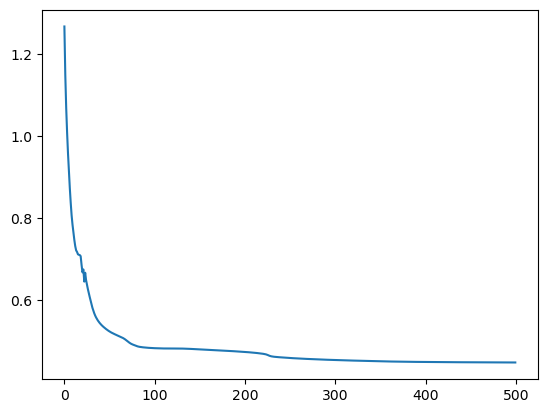

In [22]:
plt.plot(cost)